权重衰减是最广泛使用的正则化技术之一

In [1]:
%matplotlib inline
import torch
from torch import nn
from d2l import torch as d2l

%matplotlib inline 可以在Ipython编译器里直接使用，功能是可以内嵌绘图，并且可以省略掉plt.show()这一步。

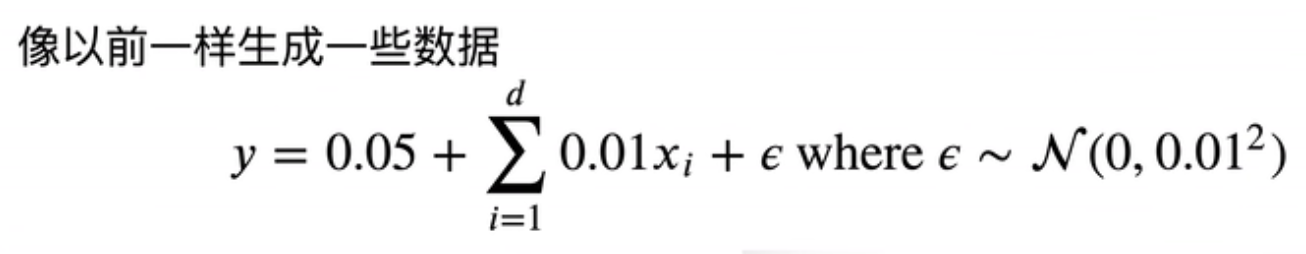

In [2]:
n_train, n_test, num_inputs, batch_size = 20, 100, 200, 5
true_w, true_b = torch.ones((num_inputs, 1)) * 0.01, 0.05
train_data = d2l.synthetic_data(true_w, true_b, n_train)
train_iter = d2l.load_array(train_data, batch_size)
test_data = d2l.synthetic_data(true_w, true_b, n_test)
test_iter = d2l.load_array(test_data, batch_size, is_train=False)


torch.ones((num_inputs, 1)) * 0.01

这段代码使用 PyTorch 创建了一个形状为 `(num_inputs, 1)` 的张量，其中每个元素的值都是 0.01。让我们逐步解释：

```python
torch.ones((num_inputs, 1))
```

- `torch.ones((num_inputs, 1))`: 这行代码创建了一个形状为 `(num_inputs, 1)` 的张量，其中所有元素的值都为 1。这是通过调用 `torch.ones` 函数来实现的，参数 `(num_inputs, 1)` 指定了张量的形状。

```python
torch.ones((num_inputs, 1)) * 0.01
```

- `* 0.01`: 这里将上述张量中的每个元素都乘以 0.01，因为 Python 支持广播（broadcasting）的特性，所以 0.01 会被自动扩展成与 `(num_inputs, 1)` 张量相同的形状，然后与原始张量中的每个元素相乘。

因此，整个表达式 `torch.ones((num_inputs, 1)) * 0.01` 的结果是一个形状为 `(num_inputs, 1)` 的张量，其中每个元素的值都是 0.01。通常这样的操作用于初始化模型的参数，例如在神经网络中初始化权重或偏置项时，可以使用类似的方法。

初始化模型参数

In [3]:
def init_params():
    w = torch.normal(0, 1, size=(num_inputs, 1), requires_grad=True)
    b = torch.zeros(1, requires_grad=True)
    return [w, b]

定义L2范数惩罚

In [4]:
def l2_penalty(w):
    return torch.sum(w.pow(2)) / 2

In [18]:
def train(lambd):
    w, b = init_params()
    net, loss = lambda X: d2l.linreg(X, w, b), d2l.squared_loss
    num_epochs, lr = 100, 0.003
    animator = d2l.Animator(xlabel='epoch', 
                            ylabel='loss', 
                            yscale='log',
                            xlim=[5,num_epochs],
                            legend=['train', 'test']
                           )
    for epoch in range(num_epochs):
        for X, y in train_iter:
            l = loss(net(X), y) + lambd * l2_penalty(w)
            l.sum().backward()
            d2l.sgd([w, b], lr, batch_size)
        if (epoch + 1) % 5 == 0:
            animator.add(epoch + 1, 
                         (d2l.evaluate_loss(net, train_iter, loss),
                          d2l.evaluate_loss(net, test_iter, loss)
                         )
                        )
    print("w的L2范数是：",torch.norm(w).item())
    

这行代码的意思是打印张量 `w` 的L2范数。

具体解释如下：

```python
print("w的L2范数是：",torch.norm(w).item())
```

- `torch.norm(w)`: 这里使用了 PyTorch 中的 `torch.norm` 函数来计算张量 `w` 的L2范数（欧几里德范数）。
  
- `.item()`: `item()` 方法用于从包含单个元素的张量中获取 Python 数值。因为 `torch.norm(w)` 返回的是一个张量，但我们通常希望得到一个单独的数值作为结果，所以使用 `item()` 方法将其转换为 Python 数值。

- `print("w的L2范数是：",torch.norm(w).item())`: 这行代码将 "w的L2范数是：" 和 `torch.norm(w).item()` 的结果一起打印出来，从而输出张量 `w` 的L2范数的数值。

L2范数通常用于衡量向量的长度或大小，是向量各个元素平方和的平方根。在深度学习中，L2范数也常用于正则化项的计算，以控制模型的复杂度。

忽略正则化直接训练

w的L2范数是： 14.251522064208984


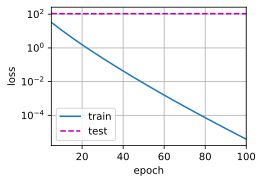

In [19]:
train(lambd = 0)

w的L2范数是： 0.34312644600868225


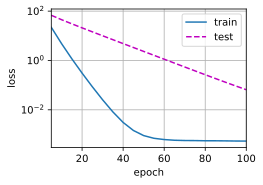

In [20]:
train(lambd = 3)